### Experiment setup

- 2 datasets
- no additional features, random cross features and features from dnn2lr
- for every neural network 3 lr rates were fitted
- final evaluation models: linear, lgbm

***Note:*** This implementation doesnt use final features selection based on linear model feature importances since it can harm performance of another algorithms.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_rows', None)
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [88]:
# !python get_models_info.py

dt = pd.read_csv("../output/run_summary.csv")
dt['cross_f'].fillna("no", inplace=True)
vals = []
for v in dt[['cross_f', 'cross_type']].values:
    if v[0] == 'no':
        vals.append(v[0])
    elif v[1] == "dnn2lr":
        vals.append(v[1])
    else:
        vals.append('random')
dt['cross_cols'] = vals

dt['dataset'] = dt['train_path'].str.split('/').str[-2]
dt.columns

Index(['category', 'drop', 'target', 'task', 'train_path', 'valid_path',
       'test_path', 'model', 'gpu', 'cross_f', 'exp_id', 'train time (sec)',
       'logloss_val', 'logloss_test', 'log_path', 'nu', 'cross_type',
       'opt_params', 'nn_model', 'auc_val', 'auc_test', 'cross_cols',
       'dataset'],
      dtype='object')

### Analytics

In following tables you will see `log-loss` metric (lower -- better) with different experiment setups.

In [92]:
# base model fit

dt[dt['cross_cols'] == 'no'].pivot_table(index=['dataset'],
                                        columns='model',
                                        values='logloss_test').style.highlight_min(axis=1, color='darkgreen')

model,dense,denselight,lgb,linear,mlp,resnet
dataset,,,,,,
bnp,0.535489,0.528815,0.486858,0.488290,0.534324,0.535761
credit,1.486185,1.679574,2.125349,2.144629,1.609510,1.385239


With no additional features lgb and resnet are best models.

In [93]:
for dataset in dt['dataset'].unique():
    print(dataset)
    _dt = dt[dt.model.isin(['lgb', 'linear'])]
    _dt = _dt[_dt['dataset'] == dataset]
    display(pd.pivot_table(_dt, index=['dataset', 'cross_cols'],
                            columns='model',
                            values='logloss_test', aggfunc='min').style.highlight_min(axis=0, color='darkgreen'))

If we add some new cross feature we can see that in 1 case (credit dataset) `dnn2lr` significantly boost performance. In another case values are very close, so it's hard to make conclusion.

In [99]:
for dataset in dt['dataset'].unique():
    print(dataset)
    _dt = dt[dt.nn_model.isna() == False]
    _dt = _dt[_dt['dataset'] == dataset]
    display(pd.pivot_table(_dt, index=['model'],
                            columns='nn_model',
                            values='logloss_test', aggfunc='mean').style.highlight_min(axis=1, color='darkgreen'))

credit


nn_model,dense,denselight,mlp,resnet
model,,,,
lgb,2.011321,2.044474,2.041029,2.106914
linear,2.188892,2.191252,2.182849,2.174118


bnp


nn_model,dense,denselight,mlp,resnet
model,,,,
lgb,0.487266,0.487214,0.486959,0.487056
linear,0.488686,0.489410,0.488668,0.488266


Here we can see which neural network benefits which final model the most. Based on credit dataset `dense` model (which have the most parameters) is better for complex model such as boosting while `resnet` better for linear model.

credit


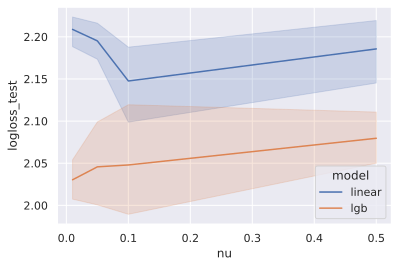

bnp


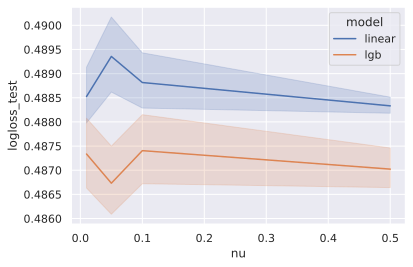

In [100]:
columns = ["dataset", "model", "nu", "logloss_test"]
_dt = dt[dt['cross_cols'] == 'dnn2lr']
_dt = _dt[columns]
_dt 

for dataset in dt['dataset'].unique():
    print(dataset)
    sns.lineplot(data=_dt[_dt['dataset'] == dataset], x='nu', y='logloss_test', hue='model')
    plt.show()

Optimal quntile value is about 0.05-0.1

In [84]:
dt[['logloss_val', 'logloss_test']].corr('spearman')

,logloss_val,logloss_test
logloss_val,1.000000,0.968382
logloss_test,0.968382,1.000000
